In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
fps_xgboost_p_1 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_1.csv')
fps_xgboost_p_2 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_2.csv')
fps_xgboost_p_3 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_3.csv')
fps_xgboost_p_4 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_4.csv')
fps_xgboost_p_5 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_5.csv')
fps_xgboost_p_6 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_p_fold_6.csv')
fps_xgboost = pd.concat((fps_xgboost_p_1, fps_xgboost_p_2, fps_xgboost_p_3, fps_xgboost_p_4, fps_xgboost_p_5, fps_xgboost_p_6),axis=0)
fps_xgboost = fps_xgboost.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(fps_xgboost['actual'], fps_xgboost['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(fps_xgboost['actual'], fps_xgboost['predict'])))

# R^2 Coefficient of Determination
print(r2_score(fps_xgboost['actual'], fps_xgboost['predict']))

2.242222116921217
3.0466851554719288
0.5033466911286119


In [4]:
len(fps_xgboost)

1183

In [5]:
fps_xgboost['residual']= fps_xgboost['predict']-fps_xgboost['actual']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((fps_xgboost['residual']**2).sum()/(len(fps_xgboost)-2))
sdr

3.049263814550112

In [7]:
fps_xgboost['std_residual'] = fps_xgboost['residual']/sdr
fps_xgboost['std_residual']

0     -0.607202
1     -0.105710
2     -1.919457
3      3.193296
4      0.078230
         ...   
192   -0.203791
193   -0.366613
194   -0.777546
195   -0.023307
196   -0.830199
Name: std_residual, Length: 1183, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
fps_xgboost_outliers = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
fps_xgboost_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
3,3,44,44,44,CCc1ccccc1CC,44,0.1,9.837201,9.737201,3.193296
39,39,243,243,243,ClC(Cl)(Cl)C=C,243,15.5,2.881384,-12.618616,-4.138250
44,44,274,274,274,Cc1ccon1,274,14.8,4.111037,-10.688963,-3.505424
123,123,732,733,732,OCC(O)CO.OC(O)=O,732,25.5,13.858645,-11.641355,-3.817759
64,64,367,367,367,N,367,16.7,6.013224,-10.686776,-3.504707
127,127,724,725,724,NC=O,724,26.2,11.886704,-14.313296,-4.694017
167,167,964,966,964,[O-][O+]=O,964,4.2,15.633870,11.433870,3.749715
2,2,7,7,7,CC(Cl)=C(Cl)Cl,7,15.7,6.534540,-9.165460,-3.005794
72,72,417,417,417,C1OC1C2CO2,417,14.4,4.368004,-10.031996,-3.289973
81,81,473,473,473,[Ca++].NC#N,473,27.6,13.693809,-13.906191,-4.560508


In [9]:
# Set the default text font size
plt.rc('font', size=22)

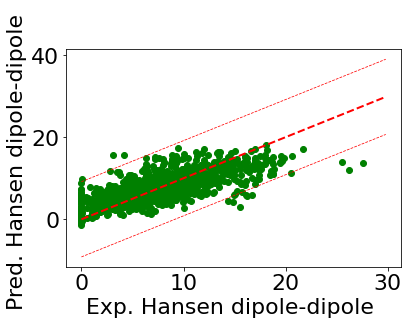

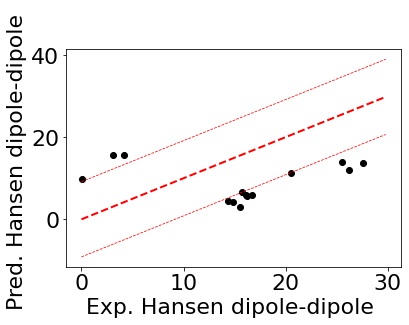

In [10]:
plt.figure(2)

ln = np.arange(0, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp. Hansen dipole-dipole ')
plt.ylabel('Pred. Hansen dipole-dipole ')
plt.show()

ln = np.arange(0, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers['actual'], y=fps_xgboost_outliers['predict'], color='black')
plt.xlabel('Exp. Hansen dipole-dipole ')
plt.ylabel('Pred. Hansen dipole-dipole ')
plt.show()

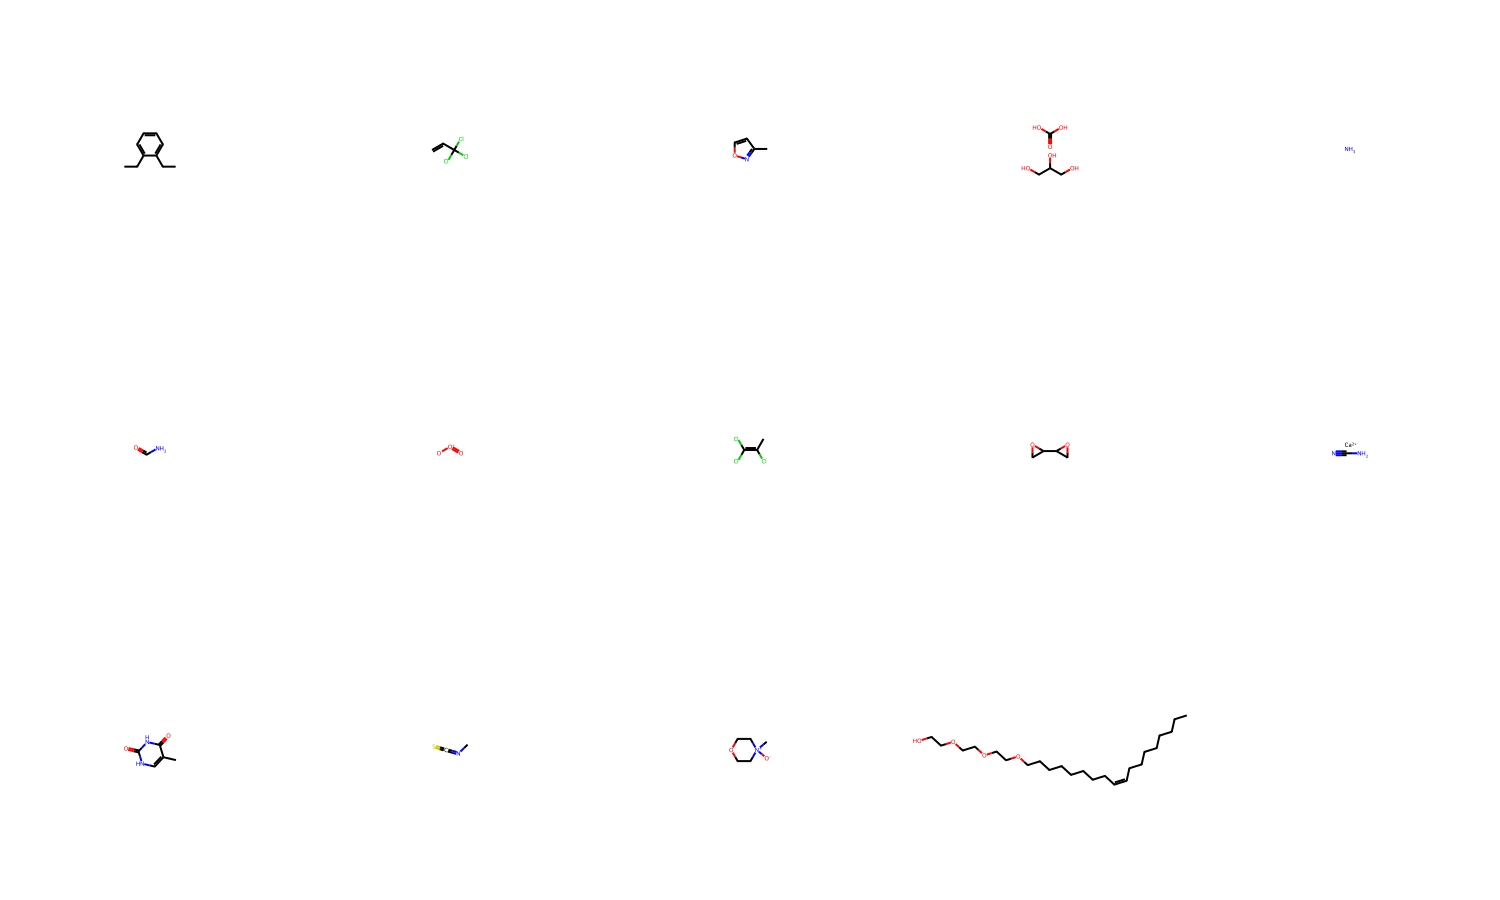

In [11]:
outliners = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [12]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
fps_xgboost_outliers2 = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
len(fps_xgboost_outliers2)

62

In [13]:
fps_xgboost_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
3,3,44,44,44,CCc1ccccc1CC,44,0.1,9.837201,9.737201,3.193296
39,39,243,243,243,ClC(Cl)(Cl)C=C,243,15.5,2.881384,-12.618616,-4.138250
44,44,274,274,274,Cc1ccon1,274,14.8,4.111037,-10.688963,-3.505424
118,118,707,708,707,C[S](O)(=O)=O.C=C,707,9.3,15.501159,6.201159,2.033658
123,123,732,733,732,OCC(O)CO.OC(O)=O,732,25.5,13.858645,-11.641355,-3.817759
...,...,...,...,...,...,...,...,...,...,...
80,80,550,550,550,COC(Cl)Cl,550,12.9,6.388411,-6.511589,-2.135463
130,130,815,817,815,CC(=C)C(O)=O,815,2.8,11.734286,8.934286,2.929981
156,156,962,964,962,ClC(=O)C(Cl)=O,962,3.8,10.854019,7.054019,2.313351
160,160,995,997,995,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,995,0.0,6.129170,6.129170,2.010049


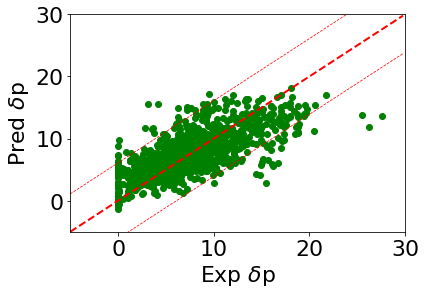

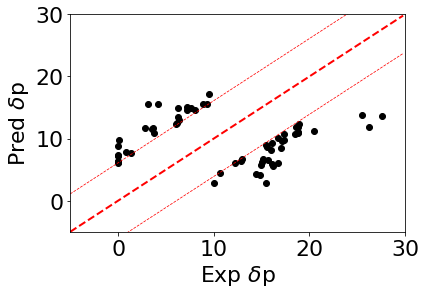

In [14]:
plt.figure(2)

ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])

plt.show()

ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers2['actual'], y=fps_xgboost_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

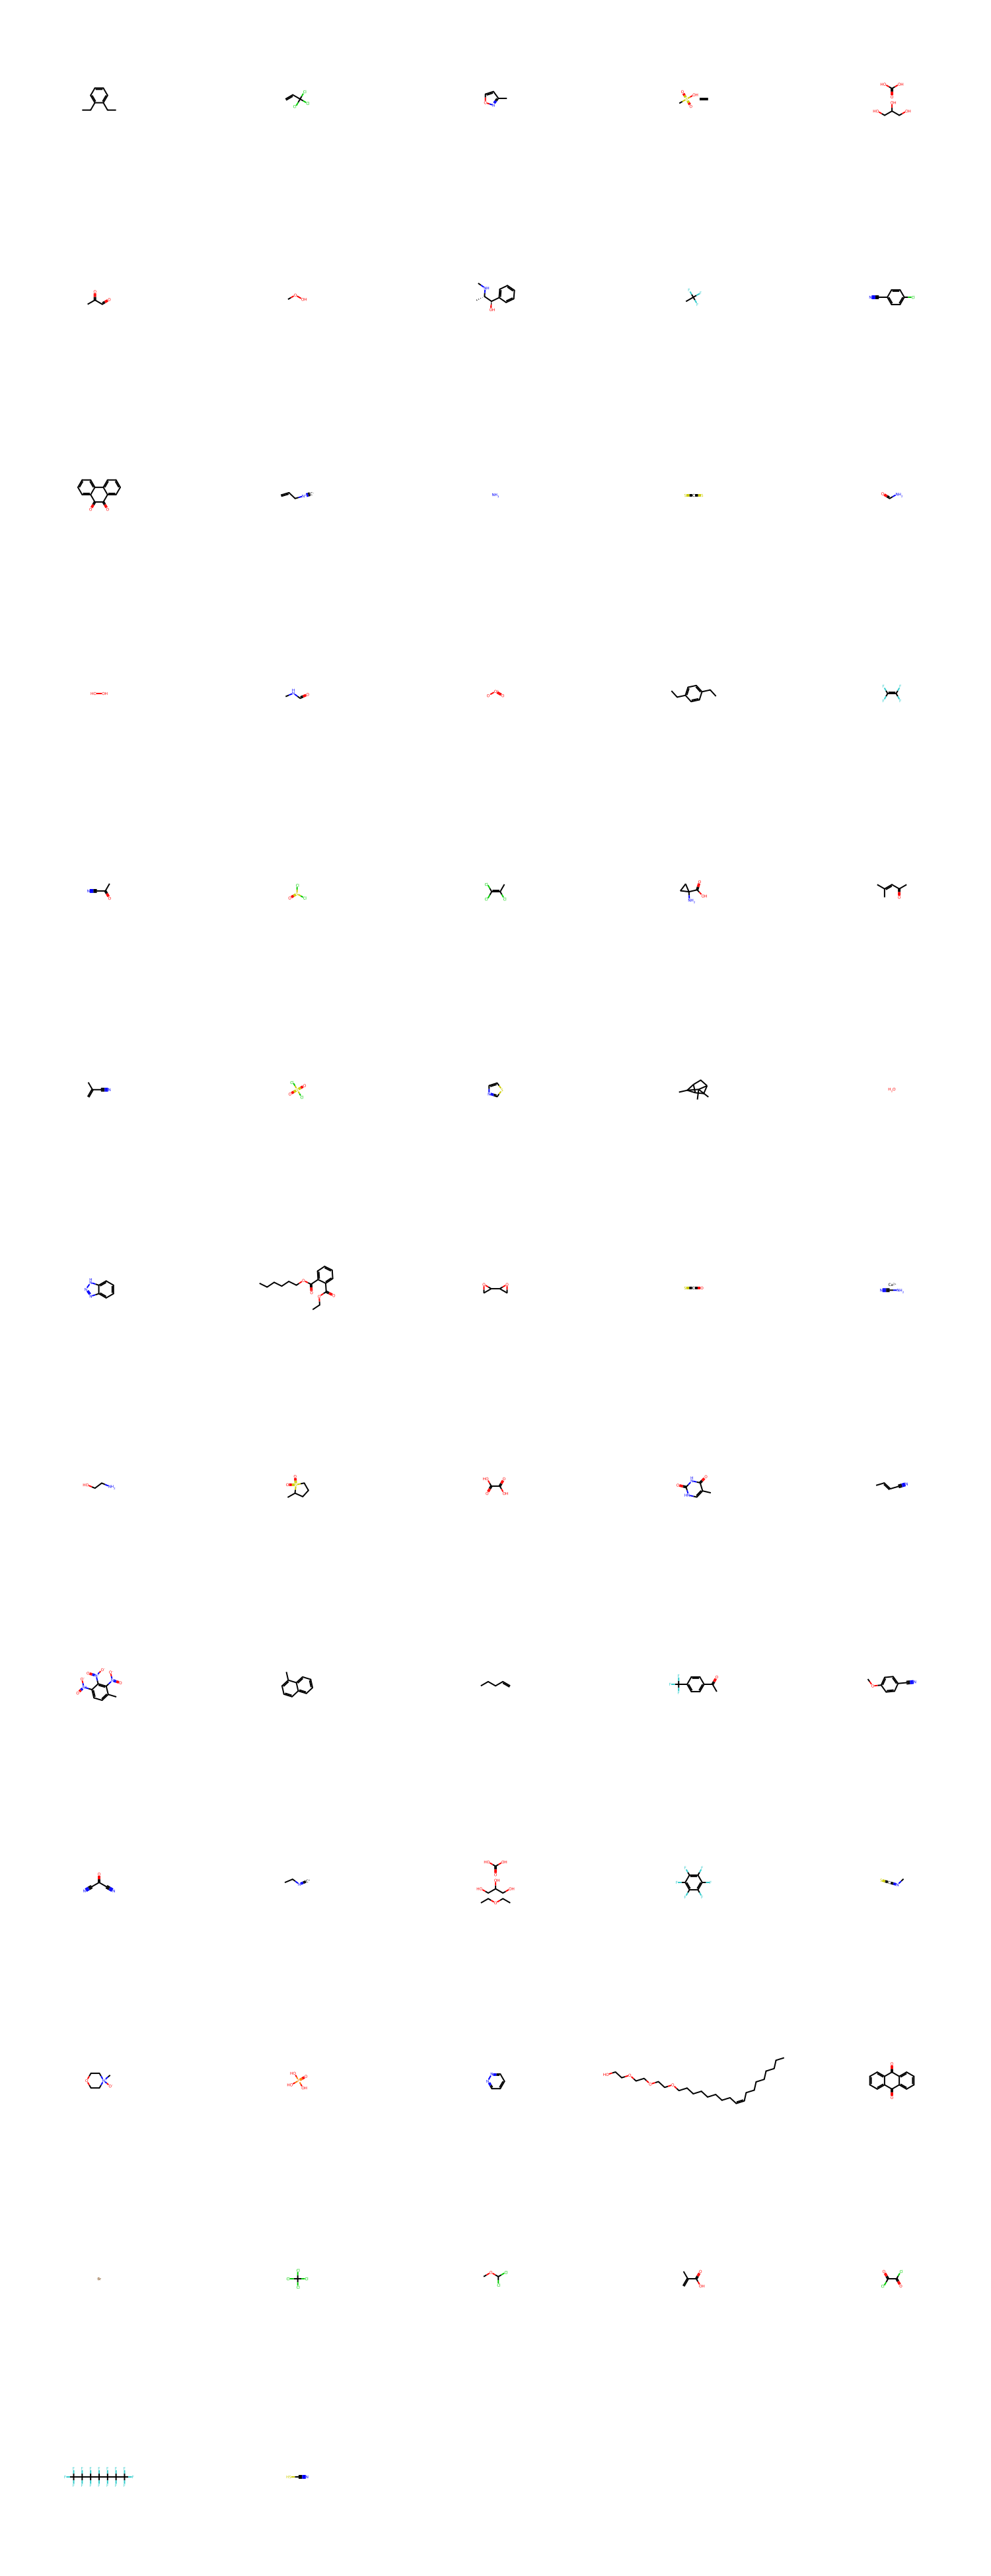

In [15]:
outliners2 = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [16]:
fps_xgboost_outliers2.to_csv('fps_xgboost_p_outliers2.csv')

In [17]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in fps_xgboost_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
117.70269914861726


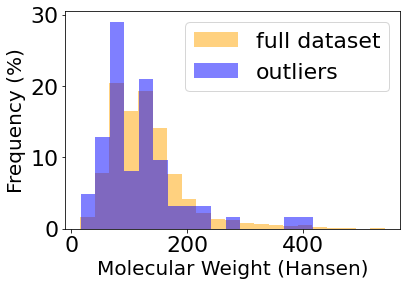

In [18]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()